In [1]:
#importing necessary libraries

from numpy.random import seed
seed(101)
import pandas as pd
import numpy as np

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [3]:
import os
from os import listdir
import cv2

In [4]:
import imageio
import skimage
import skimage.io
import skimage.transform

In [5]:
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.io import imread
import itertools
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
!wget -O Breast_Cancer_Dataset.zip https://www.dropbox.com/s/5aovcs6ldox5w9p/Breast_Cancer_Dataset.zip?dl=0

--2021-04-30 01:27:07--  https://www.dropbox.com/s/5aovcs6ldox5w9p/Breast_Cancer_Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5aovcs6ldox5w9p/Breast_Cancer_Dataset.zip [following]
--2021-04-30 01:27:08--  https://www.dropbox.com/s/raw/5aovcs6ldox5w9p/Breast_Cancer_Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3f63005393a57715d6ed9aef24.dl.dropboxusercontent.com/cd/0/inline/BNlDAqNqwmGsDknrIFFPU5p8aAtbloUSkKotjJWsOYGpGIkq-rqJAxaTwNpJ7pIqM4-KiCXNsf4Fg_SC6ME4iS456nLPE5d6usHVERiuJ9VcMSkTKNjR0t2L15dvMKvAIgNAt4wMf7RasaoVBiz4ISNc/file# [following]
--2021-04-30 01:27:08--  https://uc3f63005393a57715d6ed9aef24.dl.dropboxusercontent.com/cd/0/inline/BNlDAqNqwmGsDknrIFFPU5p8aAtbloUSkKotjJWsOYGpGI

In [7]:
mkdir Breast_Cancer_Dataset

In [8]:
!unzip Breast_Cancer_Dataset.zip -d Breast_Cancer_Dataset

Streaming output truncated to the last 5000 lines.
  inflating: Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9

## Exploring the Data Structure

In [9]:
file_name = listdir("Breast_Cancer_Dataset/IDC_regular_ps50_idx5")
print(len(file_name))

279


In [10]:
#looking at first 10 folders
file_name[0:10]

['9123',
 '12880',
 '12811',
 '13694',
 '14155',
 '12892',
 '8959',
 '8864',
 '12947',
 '16552']

#### In each folder there are several images and each folder name is the id of the patient

In [11]:
path = "Breast_Cancer_Dataset/IDC_regular_ps50_idx5/"
folder = listdir(path)
print("No. of Patients:",len(folder))

No. of Patients: 279


#### We have to find the number of total images in the dataset

In [12]:
total_img = 0
for num in range(len(folder)):
    patientid = folder[num]
    for s in [0, 1]:
        patient_path = path + patientid
        class_path = patient_path + '/' + str(s) + '/'
        sub_files = listdir(class_path)
        total_img += len(sub_files)
        
print("Total Images in dataset: ", total_img )

Total Images in dataset:  277524


#### Organizing the data into pandas data frame

In [13]:
df = pd.DataFrame(index=np.arange(0, total_img), columns=["patientid", "path", "target"])



In [14]:
i = 0
for num in range(len(folder)):
    patientid = folder[num]
    patient_path = path + patientid 
    print(patient_path)
    for s in [0,1]:
        class_path = patient_path + "/" + str(s) + "/"
        sub_files = listdir(class_path)
        for q in range(len(sub_files)):
            img_path = sub_files[q]
            df.iloc[i]["path"] = class_path + img_path
            df.iloc[i]["target"] = s
            df.iloc[i]["patientid"] = patientid
            i += 1  

df.head()

Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9123
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/12880
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/12811
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/13694
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/14155
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/12892
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/8959
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/8864
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/12947
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/16552
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/14212
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9267
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/9322
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/13616
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/12871
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/15514
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/10286
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/12820
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/16896
Breast_Cancer_Dataset/IDC_regular_ps50_idx5/14082
Breas

,patientid,path,target
0,9123,Breast_Cancer_Dataset/IDC_regular_ps50_idx5/91...,0
1,9123,Breast_Cancer_Dataset/IDC_regular_ps50_idx5/91...,0
2,9123,Breast_Cancer_Dataset/IDC_regular_ps50_idx5/91...,0
3,9123,Breast_Cancer_Dataset/IDC_regular_ps50_idx5/91...,0
4,9123,Breast_Cancer_Dataset/IDC_regular_ps50_idx5/91...,0


#### Shape of data frame[](http://)

In [15]:
df.shape

(277524, 3)

## Exploring the data

In [16]:
cancer_percentage  = df.groupby("patientid").target.value_counts() / df.groupby("patientid").target.size()
cancer_percentage  = cancer_percentage .unstack()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


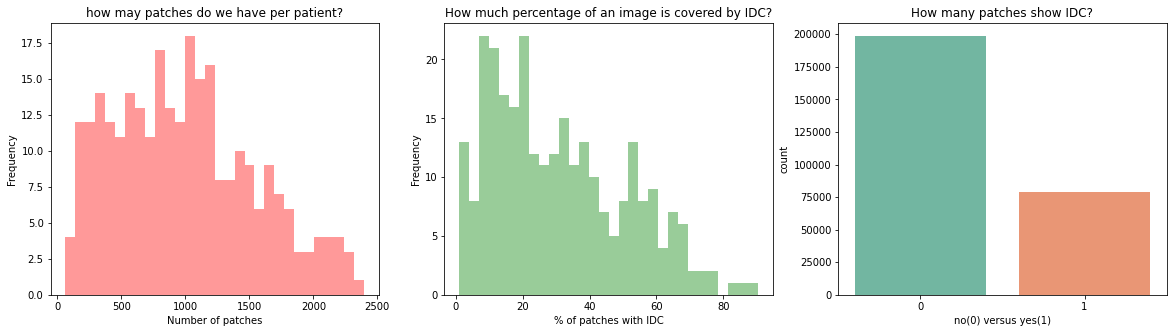

In [17]:
figure, axis = plt.subplots(1, 3,figsize = (20,5))
sns.distplot(df.groupby('patientid').size(), ax=axis[0], color='Red', kde=False, bins=30)
axis[0].set_xlabel('Number of patches')
axis[0].set_ylabel('Frequency')
axis[0].set_title('how may patches do we have per patient?')
sns.distplot(cancer_percentage .loc[:, 1]*100, ax=axis[1], color="Green", kde=False, bins=30)
axis[1].set_title("How much percentage of an image is covered by IDC?")
axis[1].set_ylabel("Frequency")
axis[1].set_xlabel("% of patches with IDC");
sns.countplot(df.target, palette="Set2", ax=axis[2]);
axis[2].set_xlabel("no(0) versus yes(1)")
axis[2].set_title("How many patches show IDC?");

In [18]:
# coverting target to int
df.target = df.target.astype(np.int)

### Displaying Cancer Tissue Samples

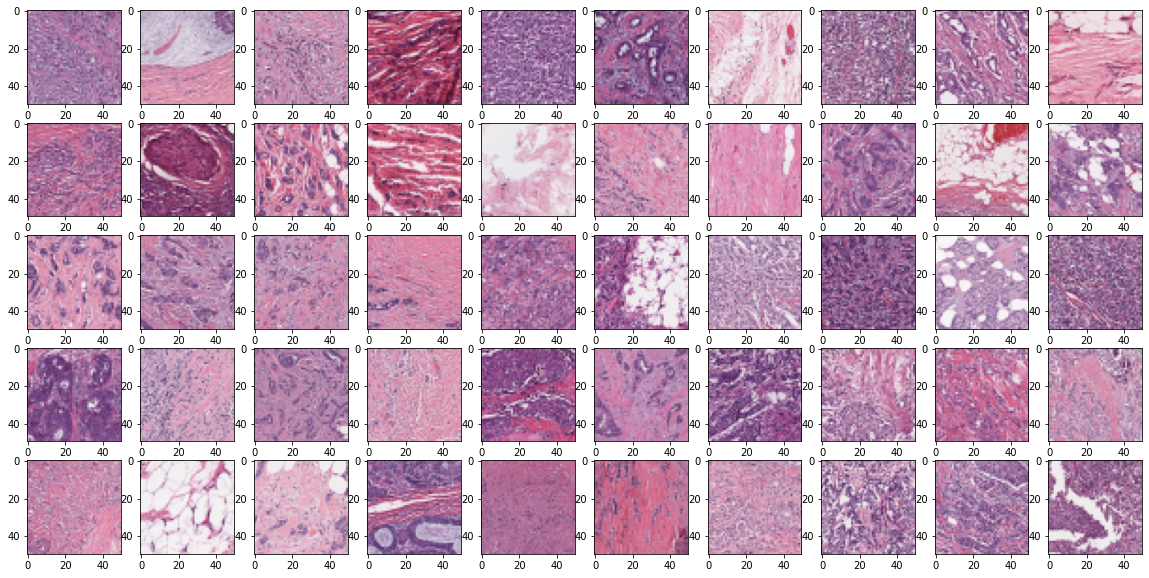

In [19]:
cancer_sel = np.random.choice(df[df.target == 1].index.values, size=50, replace=False)

figure, axis = plt.subplots(5, 10, figsize=(20, 10))

for num in range(5):
    for q in range(10):
        index = cancer_sel[q + 10*num]
        img = imread(df.loc[index, "path"])
        axis[num,q].imshow(img)
        axis[num,q].grid(False)


### Displaying Non-Cnacer Tissue Samples

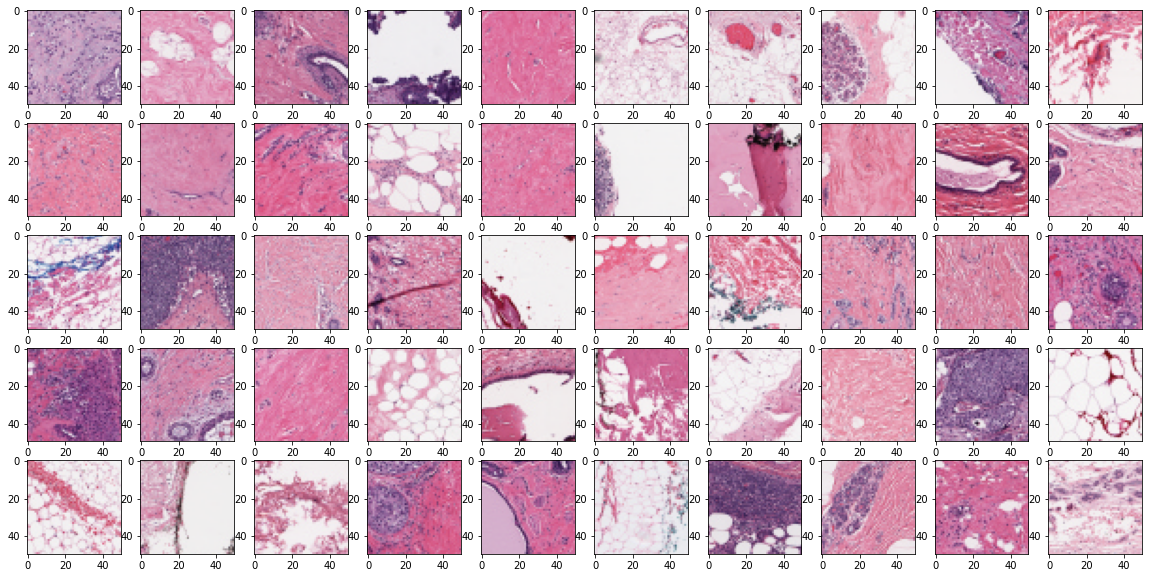

In [20]:
non_cancer_sel = np.random.choice(df[df.target == 0].index.values, size=50, replace=False)

figure, axis = plt.subplots(5, 10, figsize=(20, 10))

for num in range(5):
    for q in range(10):
        index = non_cancer_sel[q + 10*num]
        img = imread(df.loc[index, "path"])
        axis[num,q].imshow(img)
        axis[num,q].grid(False)

### Insights

* Cancer Tissur appears to be more viloet.

* But some non-caner tissue is also violet.


## Preparing the dataset

In [21]:
# Creating diresctory to store all images
all_img_dir = 'all_images_dir'


In [22]:
if os.path.isdir(all_img_dir):
    pass
else:
    os.mkdir(all_img_dir)

In [23]:
# This code copies all images from their seperate folders into the same 
# folder called all_images_dir.

'''
The directory structure is like:
    patient_id:
                0
                1
'''

patients_list = folder

for patients in patients_list:
    
    path_0 = "Breast_Cancer_Dataset/IDC_regular_ps50_idx5/" + str(patients) + '/0'
    path_1 = "Breast_Cancer_Dataset/IDC_regular_ps50_idx5/" + str(patients) + '/1'
    
    # create list of all files in folder 0
    file_list_0 = listdir(path_0)
    
    #create a list of all files in folder 1
    file_list_1 = listdir(path_1)
    
    # moving the 0 class images to all_img_dir
    for f_name in file_list_0:
        
        source = os.path.join(path_0, f_name)
        destination = os.path.join(all_img_dir, f_name)
        shutil.copyfile(source, destination)
        
    # moving the 1 class images to all_img_dir
    for f_name in file_list_1:
        
        source = os.path.join(path_1, f_name)
        destination = os.path.join(all_img_dir, f_name)
        shutil.copyfile(source, destination) 

In [24]:
# Total number of images
len(listdir(all_img_dir))

277524

### Creating dataframe of all images

In [25]:
img_list = os.listdir('all_images_dir')
data_df = pd.DataFrame(img_list, columns=['image_id'])
data_df.head()

,image_id
0,9036_idx5_x1901_y2151_class0.png
1,9266_idx5_x1601_y1501_class0.png
2,9228_idx5_x1151_y1951_class0.png
3,16569_idx5_x701_y251_class0.png
4,13462_idx5_x601_y1901_class1.png


In [26]:
# Defining helper functions

def extract_patientid(h):
    
    e = h.split('_')
    patientid = e[0]
    
    return patientid    

In [27]:
def target_extraction(h):
    
    e = h.split('_')
    b = e[4]
    target = b[5]
    
    return target

In [28]:
# creating new column named patientid
data_df['patientid'] = data_df['image_id'].apply(extract_patientid)

#creating new column named target
data_df['target'] = data_df['image_id'].apply(target_extraction)

data_df.head(10)

,image_id,patientid,target
0,9036_idx5_x1901_y2151_class0.png,9036,0
1,9266_idx5_x1601_y1501_class0.png,9266,0
2,9228_idx5_x1151_y1951_class0.png,9228,0
3,16569_idx5_x701_y251_class0.png,16569,0
4,13462_idx5_x601_y1901_class1.png,13462,1
5,10275_idx5_x2151_y1451_class1.png,10275,1
6,9322_idx5_x1701_y101_class0.png,9322,0
7,14079_idx5_x1151_y701_class1.png,14079,1
8,12870_idx5_x301_y2301_class0.png,12870,0
9,12949_idx5_x1251_y251_class0.png,12949,0


In [29]:
# class distribution of the images

data_df['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

### Balance the class distribution

* We can see that the class 1 images are higher in number that of class 0

* So to prevent this we balance the dataset

* We do this so that the Neural Network dose not lean on favouring only one class 

In [30]:
sample_size = 78786
# take a sample of the majority class 0 (total = 198738)
df_0 = data_df[data_df['target'] == '0'].sample(sample_size, random_state=101)
# take a sample of class 1 (total = 78786)
df_1 = data_df[data_df['target'] == '1'].sample(sample_size, random_state=101)

In [31]:
# concat the two dataframes
data_df = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)

In [32]:
# Check the new class distribution
data_df['target'].value_counts()

1    78786
0    78786
Name: target, dtype: int64

### Creating train and test sets

In [33]:
Y = data_df['target']
data_train, data_value = train_test_split(data_df, test_size=0.10, random_state=101, stratify=Y)
print(data_train.shape)
print(data_value.shape)

(141814, 3)
(15758, 3)


### Creating Directory Structure

In [34]:
# Creating new base directory
basedir ='base_dir'
os.mkdir(basedir)

In [35]:
# Creating train directory inside base directory
traindir = os.path.join(basedir, 'train_dir')
os.mkdir(traindir)

In [36]:
# Creating validation directory inside base directory
val_dir = os.path.join(basedir, 'val_dir')
os.mkdir(val_dir)

In [37]:
# create new folders inside traindir
a_no_idc = os.path.join(traindir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(traindir, 'b_has_idc')
os.mkdir(b_has_idc)

In [38]:
# create new folders inside val_dir
a_no_idc = os.path.join(val_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(val_dir, 'b_has_idc')
os.mkdir(b_has_idc)

In [39]:
# check that the folders have been created
os.listdir('base_dir/train_dir')

['a_no_idc', 'b_has_idc']

In [40]:
# Set the id as the index in df_data
data_df.set_index('image_id', inplace=True)

In [41]:
train_list = list(data_train['image_id'])
value_list = list(data_value['image_id'])        

In [42]:
# Transfering the train img
for img in train_list:

    try: 
        f_name = img
        target = data_df.loc[img, 'target']

        if target == '0':
            label = 'a_no_idc'
        if target == '1':
            label = 'b_has_idc'

        # source path to img
        source = os.path.join(all_img_dir, f_name)
        # destination path to img
        destination = os.path.join(traindir, label, f_name)
        # move the img from the source to the destination
        shutil.move(source, destination)
    except: 
        continue

In [43]:
for img in value_list:

    try: 
        f_name = img
        target = data_df.loc[img,'target']

        if target == '0':
            label = 'a_no_idc'
        if target == '1':
            label = 'b_has_idc'


        # source path to image
        source = os.path.join(all_img_dir, f_name)
        # destination path to image
        destination = os.path.join(val_dir, label, f_name)
        # move the image from the source to the destination
        shutil.move(source, destination)

    except:
        continue

In [44]:
# check how many val images we have in each folder
print(len(os.listdir('base_dir/train_dir/a_no_idc')))
print(len(os.listdir('base_dir/train_dir/b_has_idc')))

70907
70907


### Setting up image generators

In [45]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

In [46]:
n_train_samples = len(data_train)
n_val_samples = len(data_value)
train_batch_size = 10
value_batch_size = 10

In [47]:
train_steps = np.ceil(n_train_samples / train_batch_size)
value_steps = np.ceil(n_val_samples / value_batch_size)

In [48]:
image_size = 50

In [49]:
data_gen = ImageDataGenerator(rescale = 1.0 / 255,
                             rotation_range = 90,
                             zoom_range = 0.2,
                             horizontal_flip=True,
                             vertical_flip=True)

In [50]:
train_gen = data_gen.flow_from_directory(train_path,
                                        target_size=(image_size,image_size),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

Found 141814 images belonging to 2 classes.


In [51]:
value_gen = data_gen.flow_from_directory(valid_path,
                                        target_size=(image_size,image_size),
                                        batch_size=value_batch_size,
                                        class_mode='categorical')

Found 15758 images belonging to 2 classes.


In [52]:
# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = data_gen.flow_from_directory(valid_path,
                                        target_size=(image_size,image_size),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 15758 images belonging to 2 classes.


In [53]:
# Building the model
kernelsize = (3,3)
pool_size= (2,2)
filters_1 = 32
filters_2 = 64
filters_3 = 128 

In [54]:
dropout_conv = 0.3
dropout_dense = 0.3

In [55]:
model = Sequential()
model.add(Conv2D(filters_1, kernelsize, activation = 'relu', 
                 input_shape = (image_size, image_size, 3)))
model.add(Conv2D(filters_1, kernelsize, activation = 'relu'))
model.add(Conv2D(filters_1, kernelsize, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

In [56]:
model.add(Conv2D(filters_2, kernelsize, activation ='relu'))
model.add(Conv2D(filters_2, kernelsize, activation ='relu'))
model.add(Conv2D(filters_2, kernelsize, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

In [57]:
model.add(Conv2D(filters_3, kernelsize, activation ='relu'))
model.add(Conv2D(filters_3, kernelsize, activation ='relu'))
model.add(Conv2D(filters_3, kernelsize, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

In [58]:
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        3

### Training the model

In [59]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [60]:
file_path = "model.h5"
check_point = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

In [61]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, 
                                   verbose=1, mode='max', min_lr=0.00001)
callbacks_list = [check_point, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=value_gen,
                    validation_steps=value_steps,
                    epochs=10, verbose=1,
                    callbacks=callbacks_list)

try:
    model.save('model.h5')
except:
    pass

try:
    model.save('model.h5')
except:
    pass

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
14182/14182 [==============================] - 308s 19ms/step - loss: 0.5068 - accuracy: 0.7568 - val_loss: 0.4132 - val_accuracy: 0.8180
Epoch 2/10
14182/14182 [==============================] - 247s 17ms/step - loss: 0.4075 - accuracy: 0.8244 - val_loss: 0.3952 - val_accuracy: 0.8239
Epoch 3/10
14182/14182 [==============================] - 234s 17ms/step - loss: 0.3794 - accuracy: 0.8404 - val_loss: 0.3755 - val_accuracy: 0.8459
Epoch 4/10
14182/14182 [==============================] - 234s 16ms/step - loss: 0.3707 - accuracy: 0.8442 - val_loss: 0.3574 - val_accuracy: 0.8502
Epoch 5/10
14182/14182 [==============================] - 233s 16ms/step - loss: 0.3605 - accuracy: 0.8494 - val_loss: 0.3729 - val_accuracy: 0.8337
Epoch 6/10
14182/14182 [==============================] - 233s 16ms/step - loss: 0.3538 - accuracy: 0.8507 - val_loss: 0.3514 - val_accuracy: 0.8522
Epoch 7/10
14182/14182 [==============================] - 234s 16ms/step - loss: 0.3489 - accuracy: 0.8545

In [62]:
model.save('model.h5')

### Evaluating the model

In [63]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

In [64]:
# Here the best epoch will be used.

model.load_weights('model.h5')

value_loss, value_acc = \
model.evaluate_generator(test_gen, 
                        steps=len(data_value))

print('value_loss:', value_loss)
print('value_acc:', value_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


value_loss: 0.32969167828559875
value_acc: 0.8671151399612427


### Plotting the training curves

In [65]:
# display the loss and accuracy curves
import matplotlib.pyplot as plt

In [66]:
accuracy = history.history['accuracy']
value_accuracy = history.history['val_accuracy']
loss = history.history['loss']
value_loss = history.history['val_loss']

<Figure size 432x288 with 0 Axes>

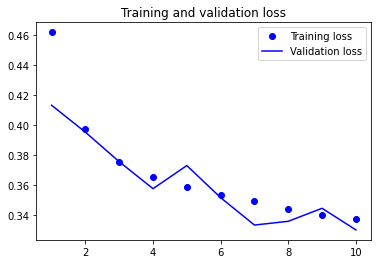

<Figure size 432x288 with 0 Axes>

In [67]:
epoch = range(1, len(accuracy) + 1)
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, value_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

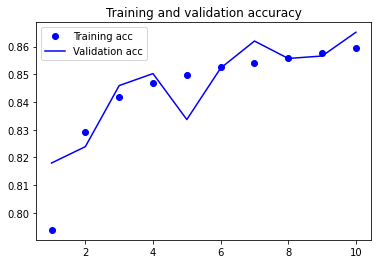

<Figure size 432x288 with 0 Axes>

In [68]:
plt.plot(epoch, accuracy, 'bo', label='Training acc')
plt.plot(epoch, value_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

### Make a prediction on the val set
We need these predictions to calculate the AUC score, print the Confusion Matrix and calculate the F1 score.

In [69]:
# make a prediction
predict = model.predict_generator(test_gen, steps=len(data_value), verbose=1)

    1/15758 [..............................] - ETA: 34:36

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


15758/15758 [==============================] - 45s 3ms/step


In [70]:
predict.shape

(15758, 2)

In [71]:
# This is how to check what index keras has internally assigned to each class. 
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

In [72]:
# Put the predictions into a dataframe.
# The columns need to be oredered to match the output of the previous cell
data_preds = pd.DataFrame(predict, columns=['no_idc', 'has_idc'])
data_preds.head()

,no_idc,has_idc
0,0.612888,0.387112
1,0.989492,0.010508
2,0.998653,0.001347
3,0.646062,0.353938
4,0.612598,0.387402


In [73]:
# Get the true labels
Y_true = test_gen.classes

In [74]:
# Get the predicted labels as probabilities
Y_pred = data_preds['has_idc']

### Calculating the AUC score

In [75]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_true, Y_pred)

0.9359124501452925

### Creating the confusion matrix

In [76]:
def plot_confusionmatrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_mark = np.arange(len(classes))
    plt.xticks(tick_mark, classes, rotation=45)
    plt.yticks(tick_mark, classes)
    
    ft = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for d, g in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(g, d, format(cm[d, g], ft),
                 horizontalalignment="center",
                 color="white" if cm[d, g] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
        

In [77]:
# Get the labels of the test images.
test_label = test_gen.classes

In [78]:
test_label.shape

(15758,)

In [79]:
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_label, predict.argmax(axis=1))

In [80]:
# Print the label associated with each class
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

Confusion matrix, without normalization
[[6683 1196]
 [ 939 6940]]


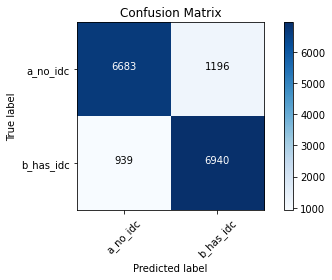

In [81]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['a_no_idc', 'b_has_idc']
plot_confusionmatrix(cm, cm_plot_labels, title='Confusion Matrix')

### Creating a classification report

In [82]:
from sklearn.metrics import classification_report

# Generate a classification report
# For this to work we need Y_pred as binary labels not as probabilities
Y_pred_binary = predict.argmax(axis=1)
report = classification_report(Y_true, Y_pred_binary, target_names=cm_plot_labels)
print(report)

              precision    recall  f1-score   support

    a_no_idc       0.88      0.85      0.86      7879
   b_has_idc       0.85      0.88      0.87      7879

    accuracy                           0.86     15758
   macro avg       0.86      0.86      0.86     15758
weighted avg       0.86      0.86      0.86     15758



In [83]:
from keras import backend as K
import tensorflow as tf

#top_values, top_indices = K.get_session().run(tf.nn.top_k(_pred_test, k=5))

AttributeError: ignored

In [84]:
top1 = 0.0
top5 = 0.0    
class_probs = model.predict(x)
for i, l in enumerate(labels):
  class_prob = class_probs[i]
  top_values = (-class_prob).argsort()[:5]
  if top_values[0] == l:
    top1 += 1.0
  if np.isin(np.array([l]), top_values):
    top5 += 1.0
 
print("top1 acc", top1/len(labels))
print("top1 acc", top5/len(labels))

NameError: ignored